In [1]:
import pandas
import pycaret.classification as classification

In [6]:
train_param_df = pandas.read_csv("train.csv", header=None)
train_param_df.columns =  [f'column_{i}' for i in range(train_param_df.shape[1])]
train_param_df

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_90,column_91,column_92,column_93,column_94,column_95,column_96,column_97,column_98,column_99
0,0.097094,1.11330,45.038,0.88184,0.087009,1.04100,1.548600,3.49800,1.85780,0.009673,...,0.076209,3.66540,0.061607,0.003161,0.036038,0.084500,2.45170,3.3373,0.065201,0.091158
1,0.050086,0.11158,94.080,1.76500,0.089417,4.80470,0.267420,NaN,0.56473,0.035123,...,0.054712,4.16870,0.075432,0.010869,0.063972,0.079892,1.97950,3.5064,0.072132,0.091950
2,0.088447,2.36340,5.058,0.14436,0.064547,2.44400,4.254500,0.36506,1.86090,0.009759,...,0.017203,4.56130,0.046505,NaN,0.084066,0.064829,3.30870,2.9969,0.064328,0.036793
3,0.772540,0.59469,NaN,0.97515,0.015987,0.52884,1.488400,3.96100,4.80630,0.048617,...,0.022891,0.12832,0.065028,0.036862,0.010010,0.020709,2.52370,2.1711,0.080865,0.081553
4,0.382410,4.81090,1955.100,0.46050,0.024453,2.02980,3.740300,4.22810,2.42920,0.156830,...,0.032051,4.37010,1.001100,0.065750,0.043547,0.629430,4.62620,3.1947,NaN,0.187180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.083012,4.44000,1140.100,5.04650,0.069693,4.32170,2.652700,4.80340,4.91870,0.088879,...,0.054703,3.50690,0.518980,0.047767,0.061994,0.256460,3.57210,4.7692,0.056299,0.162660
596,0.523780,3.32790,122.050,3.54630,1.010900,1.72230,3.131200,3.75900,3.61270,0.061250,...,0.351960,1.55980,0.023365,1.084000,0.072553,0.049359,3.46930,3.1465,0.031458,0.019107
597,0.995510,1.60620,464.090,3.58910,0.091039,1.62010,3.688400,1.84550,0.41606,0.548030,...,0.114580,3.32090,0.019906,0.057709,0.097567,0.073208,0.62583,4.6044,0.071155,0.053476
598,1.208000,2.10000,24.011,2.92140,0.055663,0.78477,1.288900,3.18080,4.77850,0.050453,...,0.011022,2.48810,0.061171,0.070312,NaN,0.043862,0.58203,4.5994,0.045182,0.031991


In [7]:
train_label_df = pandas.read_csv("train_labels.csv", header=None)
train_label_df.columns = ["target"]
train_label_df

,target
0,0
1,1
2,0
3,0
4,1
...,...
595,1
596,0
597,1
598,0


In [8]:
test_df = pandas.read_csv("test.csv", header=None)
test_df.columns =  [f'column_{i}' for i in range(test_df.shape[1])]
test_df

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_90,column_91,column_92,column_93,column_94,column_95,column_96,column_97,column_98,column_99
0,0.131200,4.20140,1428.1000,2.90940,NaN,2.66500,4.54560,0.62337,4.76250,4.287300,...,0.099056,2.0518,0.008945,0.087689,0.070505,0.029144,1.16970,0.50162,0.045636,0.142370
1,0.083796,3.92690,80.0590,1.87800,0.064623,4.14680,3.72740,0.10988,1.90250,0.093267,...,0.046586,2.9683,0.079120,0.079630,0.026689,0.066626,1.94460,2.21630,0.099828,0.088621
2,0.067591,3.01070,25.0300,1.26430,3.031100,3.09690,1.78210,1.43460,1.88170,0.002060,...,0.099853,1.2933,0.015907,0.061634,0.079210,0.022622,2.01960,3.44300,0.069516,0.025426
3,0.064830,0.11960,5.0957,1.93660,0.028638,1.21470,0.34675,1.11880,0.99529,0.060067,...,0.095575,4.4767,NaN,0.067340,0.054280,0.003331,0.95697,3.69700,0.049861,0.073140
4,0.345720,1.42610,44.0410,2.76560,0.095754,1.70890,3.94490,0.11820,1.50260,0.030124,...,0.210120,1.2719,0.028321,0.086113,0.007885,0.528200,1.87460,2.14880,0.030729,0.020493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.036445,3.86630,530.0100,3.19080,0.043165,0.21049,1.61840,2.67970,4.23950,0.075493,...,0.177070,3.7940,0.021300,0.082044,0.030834,0.068292,3.56710,2.97000,0.093883,0.056370
3996,0.080715,3.06090,145.0900,1.74360,0.051496,4.04320,4.01490,3.08130,2.81060,0.022633,...,0.029050,1.5209,0.023879,0.084377,0.005575,0.119900,1.37370,1.35300,0.068311,NaN
3997,0.260410,4.01400,1161.1000,0.58602,0.826840,0.31077,1.59060,3.87060,3.56340,0.090322,...,0.226540,4.0418,0.070592,0.014543,0.014508,0.018798,1.90200,4.91760,0.115350,0.018841
3998,0.048965,0.75552,474.0100,2.68170,0.050257,2.62300,4.58700,1.96530,1.20000,0.004702,...,0.033444,NaN,0.090492,0.013366,0.030227,0.063834,3.21960,3.78840,0.016478,0.449020


In [9]:
train_df = train_param_df.join(train_label_df)
train_df

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_91,column_92,column_93,column_94,column_95,column_96,column_97,column_98,column_99,target
0,0.097094,1.11330,45.038,0.88184,0.087009,1.04100,1.548600,3.49800,1.85780,0.009673,...,3.66540,0.061607,0.003161,0.036038,0.084500,2.45170,3.3373,0.065201,0.091158,0
1,0.050086,0.11158,94.080,1.76500,0.089417,4.80470,0.267420,NaN,0.56473,0.035123,...,4.16870,0.075432,0.010869,0.063972,0.079892,1.97950,3.5064,0.072132,0.091950,1
2,0.088447,2.36340,5.058,0.14436,0.064547,2.44400,4.254500,0.36506,1.86090,0.009759,...,4.56130,0.046505,NaN,0.084066,0.064829,3.30870,2.9969,0.064328,0.036793,0
3,0.772540,0.59469,NaN,0.97515,0.015987,0.52884,1.488400,3.96100,4.80630,0.048617,...,0.12832,0.065028,0.036862,0.010010,0.020709,2.52370,2.1711,0.080865,0.081553,0
4,0.382410,4.81090,1955.100,0.46050,0.024453,2.02980,3.740300,4.22810,2.42920,0.156830,...,4.37010,1.001100,0.065750,0.043547,0.629430,4.62620,3.1947,NaN,0.187180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.083012,4.44000,1140.100,5.04650,0.069693,4.32170,2.652700,4.80340,4.91870,0.088879,...,3.50690,0.518980,0.047767,0.061994,0.256460,3.57210,4.7692,0.056299,0.162660,1
596,0.523780,3.32790,122.050,3.54630,1.010900,1.72230,3.131200,3.75900,3.61270,0.061250,...,1.55980,0.023365,1.084000,0.072553,0.049359,3.46930,3.1465,0.031458,0.019107,0
597,0.995510,1.60620,464.090,3.58910,0.091039,1.62010,3.688400,1.84550,0.41606,0.548030,...,3.32090,0.019906,0.057709,0.097567,0.073208,0.62583,4.6044,0.071155,0.053476,1
598,1.208000,2.10000,24.011,2.92140,0.055663,0.78477,1.288900,3.18080,4.77850,0.050453,...,2.48810,0.061171,0.070312,NaN,0.043862,0.58203,4.5994,0.045182,0.031991,0


In [10]:
classification.setup(train_df, target="target")

,Description,Value
0,Session id,1718
1,Target,target
2,Target type,Binary
3,Original data shape,"(600, 101)"
4,Transformed data shape,"(600, 101)"
5,Transformed train set shape,"(420, 101)"
6,Transformed test set shape,"(180, 101)"
7,Numeric features,100
8,Rows with missing values,94.5%
9,Preprocess,True


In [11]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9143,0.9483,0.8353,0.9543,0.8903,0.8205,0.8259,0.0530
lightgbm,Light Gradient Boosting Machine,0.9071,0.9480,0.8471,0.9281,0.8841,0.8069,0.8111,0.0770
et,Extra Trees Classifier,0.9048,0.9529,0.8346,0.9314,0.8791,0.8009,0.8055,0.0380
gbc,Gradient Boosting Classifier,0.9000,0.9473,0.8529,0.9067,0.8779,0.7932,0.7956,0.1370
lr,Logistic Regression,0.8571,0.9285,0.8464,0.8214,0.8308,0.7073,0.7113,0.4600
ada,Ada Boost Classifier,0.8548,0.9134,0.7843,0.8624,0.8177,0.6976,0.7037,0.0410
ridge,Ridge Classifier,0.8524,0.9046,0.7673,0.8679,0.8101,0.6907,0.6980,0.0090
qda,Quadratic Discriminant Analysis,0.8500,0.9164,0.7503,0.8786,0.8025,0.6837,0.6951,0.0100
lda,Linear Discriminant Analysis,0.8452,0.9037,0.7559,0.8599,0.8010,0.6756,0.6823,0.0100
dt,Decision Tree Classifier,0.7976,0.7939,0.7735,0.7574,0.7626,0.5862,0.5901,0.0130


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1718, verbose=0,
                       warm_start=False)

In [12]:
my_model = classification.create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9048,0.9812,0.8235,0.9333,0.8750,0.7986,0.8026
1,0.9048,0.9506,0.8235,0.9333,0.8750,0.7986,0.8026
2,0.8571,0.7906,0.7059,0.9231,0.8000,0.6919,0.7070
3,0.9048,0.9363,0.8333,0.9375,0.8824,0.8028,0.8067
4,0.9286,0.9711,0.8889,0.9412,0.9143,0.8531,0.8542
5,0.9048,0.9757,0.8333,0.9375,0.8824,0.8028,0.8067
6,0.9524,1.0000,0.8889,1.0000,0.9412,0.9014,0.9058
7,0.9048,0.9468,0.8333,0.9375,0.8824,0.8028,0.8067
8,0.9286,0.9410,0.8333,1.0000,0.9091,0.8511,0.8607


In [13]:
tuned_model = classification.tune_model(my_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9812,0.8824,0.9375,0.9091,0.8504,0.8514
1,0.9048,0.9671,0.8824,0.8824,0.8824,0.8024,0.8024
2,0.8571,0.8047,0.7647,0.8667,0.8125,0.6978,0.7014
3,0.8810,0.9375,0.8333,0.8824,0.8571,0.7552,0.7562
4,0.8810,0.9676,0.8333,0.8824,0.8571,0.7552,0.7562
5,0.8810,0.9653,0.8333,0.8824,0.8571,0.7552,0.7562
6,0.9524,1.0000,0.8889,1.0000,0.9412,0.9014,0.9058
7,0.8810,0.9398,0.9444,0.8095,0.8718,0.7619,0.7698
8,0.9524,0.9537,0.8889,1.0000,0.9412,0.9014,0.9058


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


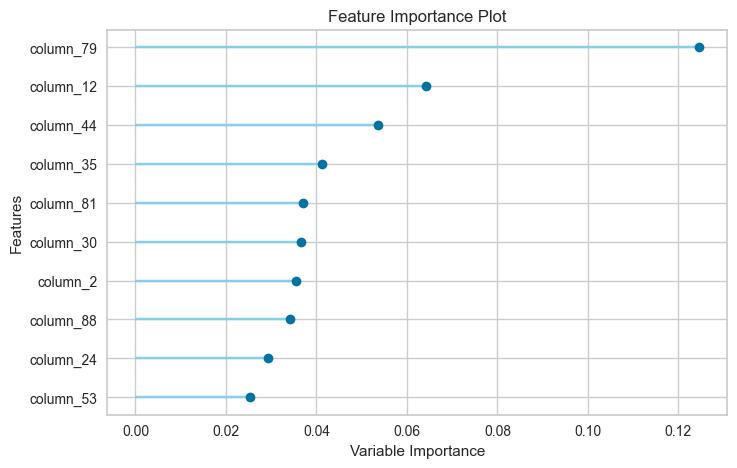

In [14]:
classification.plot_model(tuned_model, plot="feature")

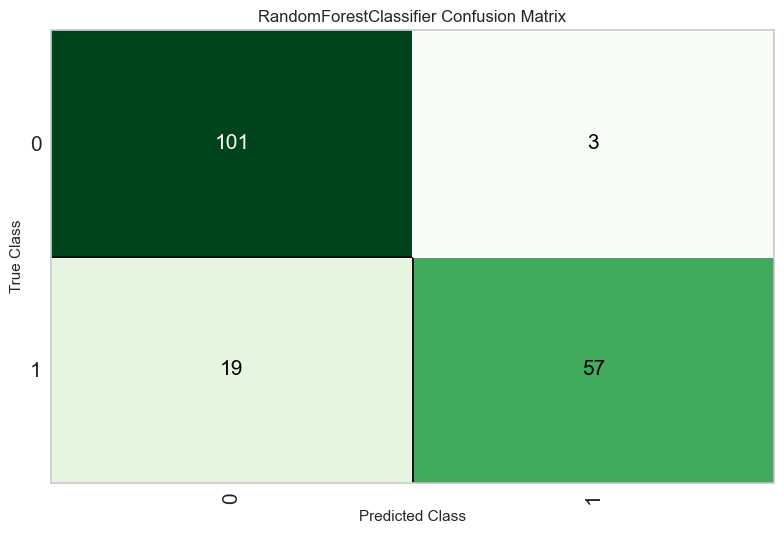

In [15]:
classification.plot_model(tuned_model, plot="confusion_matrix")

In [16]:
final_model = classification.finalize_model(tuned_model)

In [18]:
predict_df = classification.predict_model(final_model, test_df)
predict_df

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_92,column_93,column_94,column_95,column_96,column_97,column_98,column_99,prediction_label,prediction_score
0,0.131200,4.20140,1428.099976,2.90940,NaN,2.66500,4.54560,0.62337,4.76250,4.287300,...,0.008945,0.087689,0.070505,0.029144,1.16970,0.50162,0.045636,0.142370,1,0.89
1,0.083796,3.92690,80.058998,1.87800,0.064623,4.14680,3.72740,0.10988,1.90250,0.093267,...,0.079120,0.079630,0.026689,0.066626,1.94460,2.21630,0.099828,0.088621,0,0.60
2,0.067591,3.01070,25.030001,1.26430,3.031100,3.09690,1.78210,1.43460,1.88170,0.002060,...,0.015907,0.061634,0.079210,0.022622,2.01960,3.44300,0.069516,0.025426,0,0.90
3,0.064830,0.11960,5.095700,1.93660,0.028638,1.21470,0.34675,1.11880,0.99529,0.060067,...,NaN,0.067340,0.054280,0.003331,0.95697,3.69700,0.049861,0.073140,0,0.88
4,0.345720,1.42610,44.041000,2.76560,0.095754,1.70890,3.94490,0.11820,1.50260,0.030124,...,0.028321,0.086113,0.007885,0.528200,1.87460,2.14880,0.030729,0.020493,0,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.036445,3.86630,530.010010,3.19080,0.043165,0.21049,1.61840,2.67970,4.23950,0.075493,...,0.021300,0.082044,0.030834,0.068292,3.56710,2.97000,0.093883,0.056370,1,0.74
3996,0.080715,3.06090,145.089996,1.74360,0.051496,4.04320,4.01490,3.08130,2.81060,0.022633,...,0.023879,0.084377,0.005575,0.119900,1.37370,1.35300,0.068311,NaN,0,0.72
3997,0.260410,4.01400,1161.099976,0.58602,0.826840,0.31077,1.59060,3.87060,3.56340,0.090322,...,0.070592,0.014543,0.014508,0.018798,1.90200,4.91760,0.115350,0.018841,0,0.95
3998,0.048965,0.75552,474.010010,2.68170,0.050257,2.62300,4.58700,1.96530,1.20000,0.004702,...,0.090492,0.013366,0.030227,0.063834,3.21960,3.78840,0.016478,0.449020,1,0.76


In [19]:
submit_df = predict_df[["prediction_label"]]
submit_df.to_csv("submit.csv", index=False)